# Customer Churn Prediction

### In this project, we will predict whether a customer will leave the bank or not based on many factors

Following Factors are:
1. Credit score
2. Location of the Customer
3. Gender
4. Age
5. Tenure
6. Account Balance
7. Number of Bank Products Customer Uses
8. Has Credit Card
9. Is Active Member
10. Estimated Salary

In [4]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/844/1*MyKDLRda6yHGR_8kgVvckg.png')

In [6]:
# Importing the essential Libraries
import pandas as pd
import numpy as np

In [7]:
# Reading the Dataset
df = pd.read_csv("C:\one drive chandu\OneDrive\Documents\Customer-Churn-Records - Copy.csv")

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
df.shape

(10000, 18)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [11]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [12]:
# Printing Unique Values of the categorical variables
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [13]:
# Checking if there are null values or not
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [16]:
# Including only Potential Predictors as independent varibles
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [17]:
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [19]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [20]:
import seaborn as sns

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
C:\Users\Sri sai phaneendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


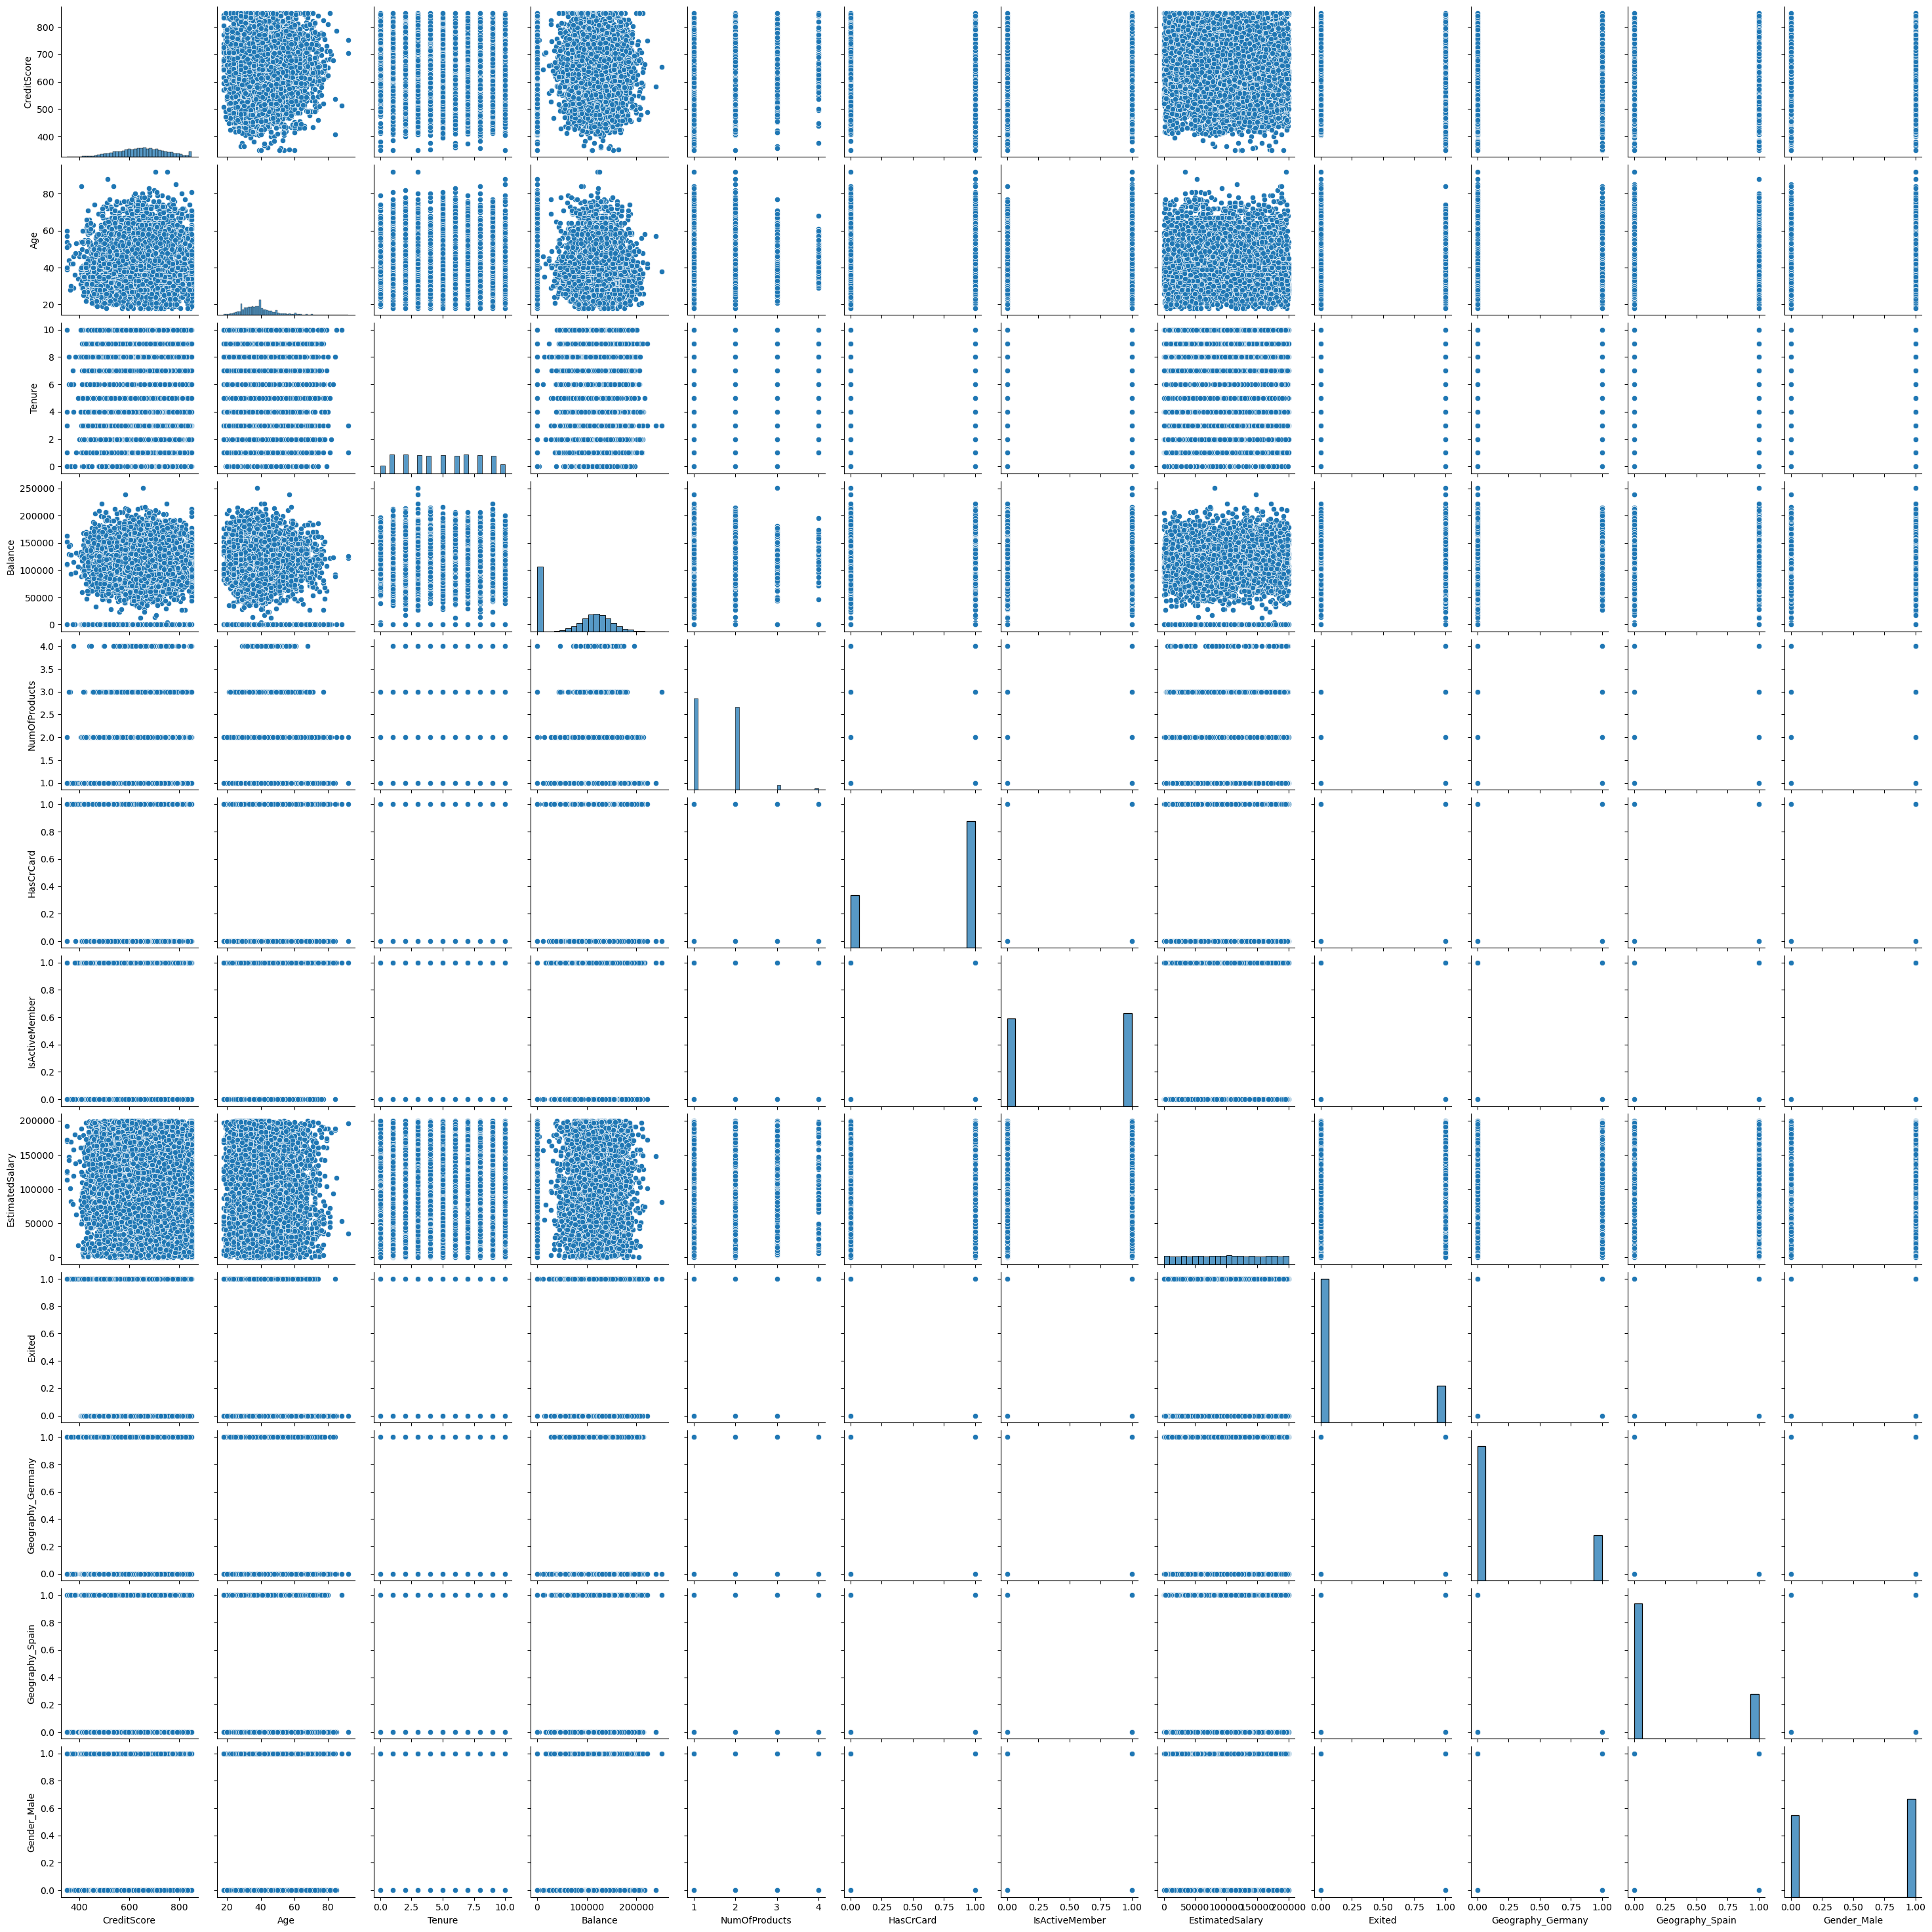

In [21]:
sns.pairplot(final_dataset)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

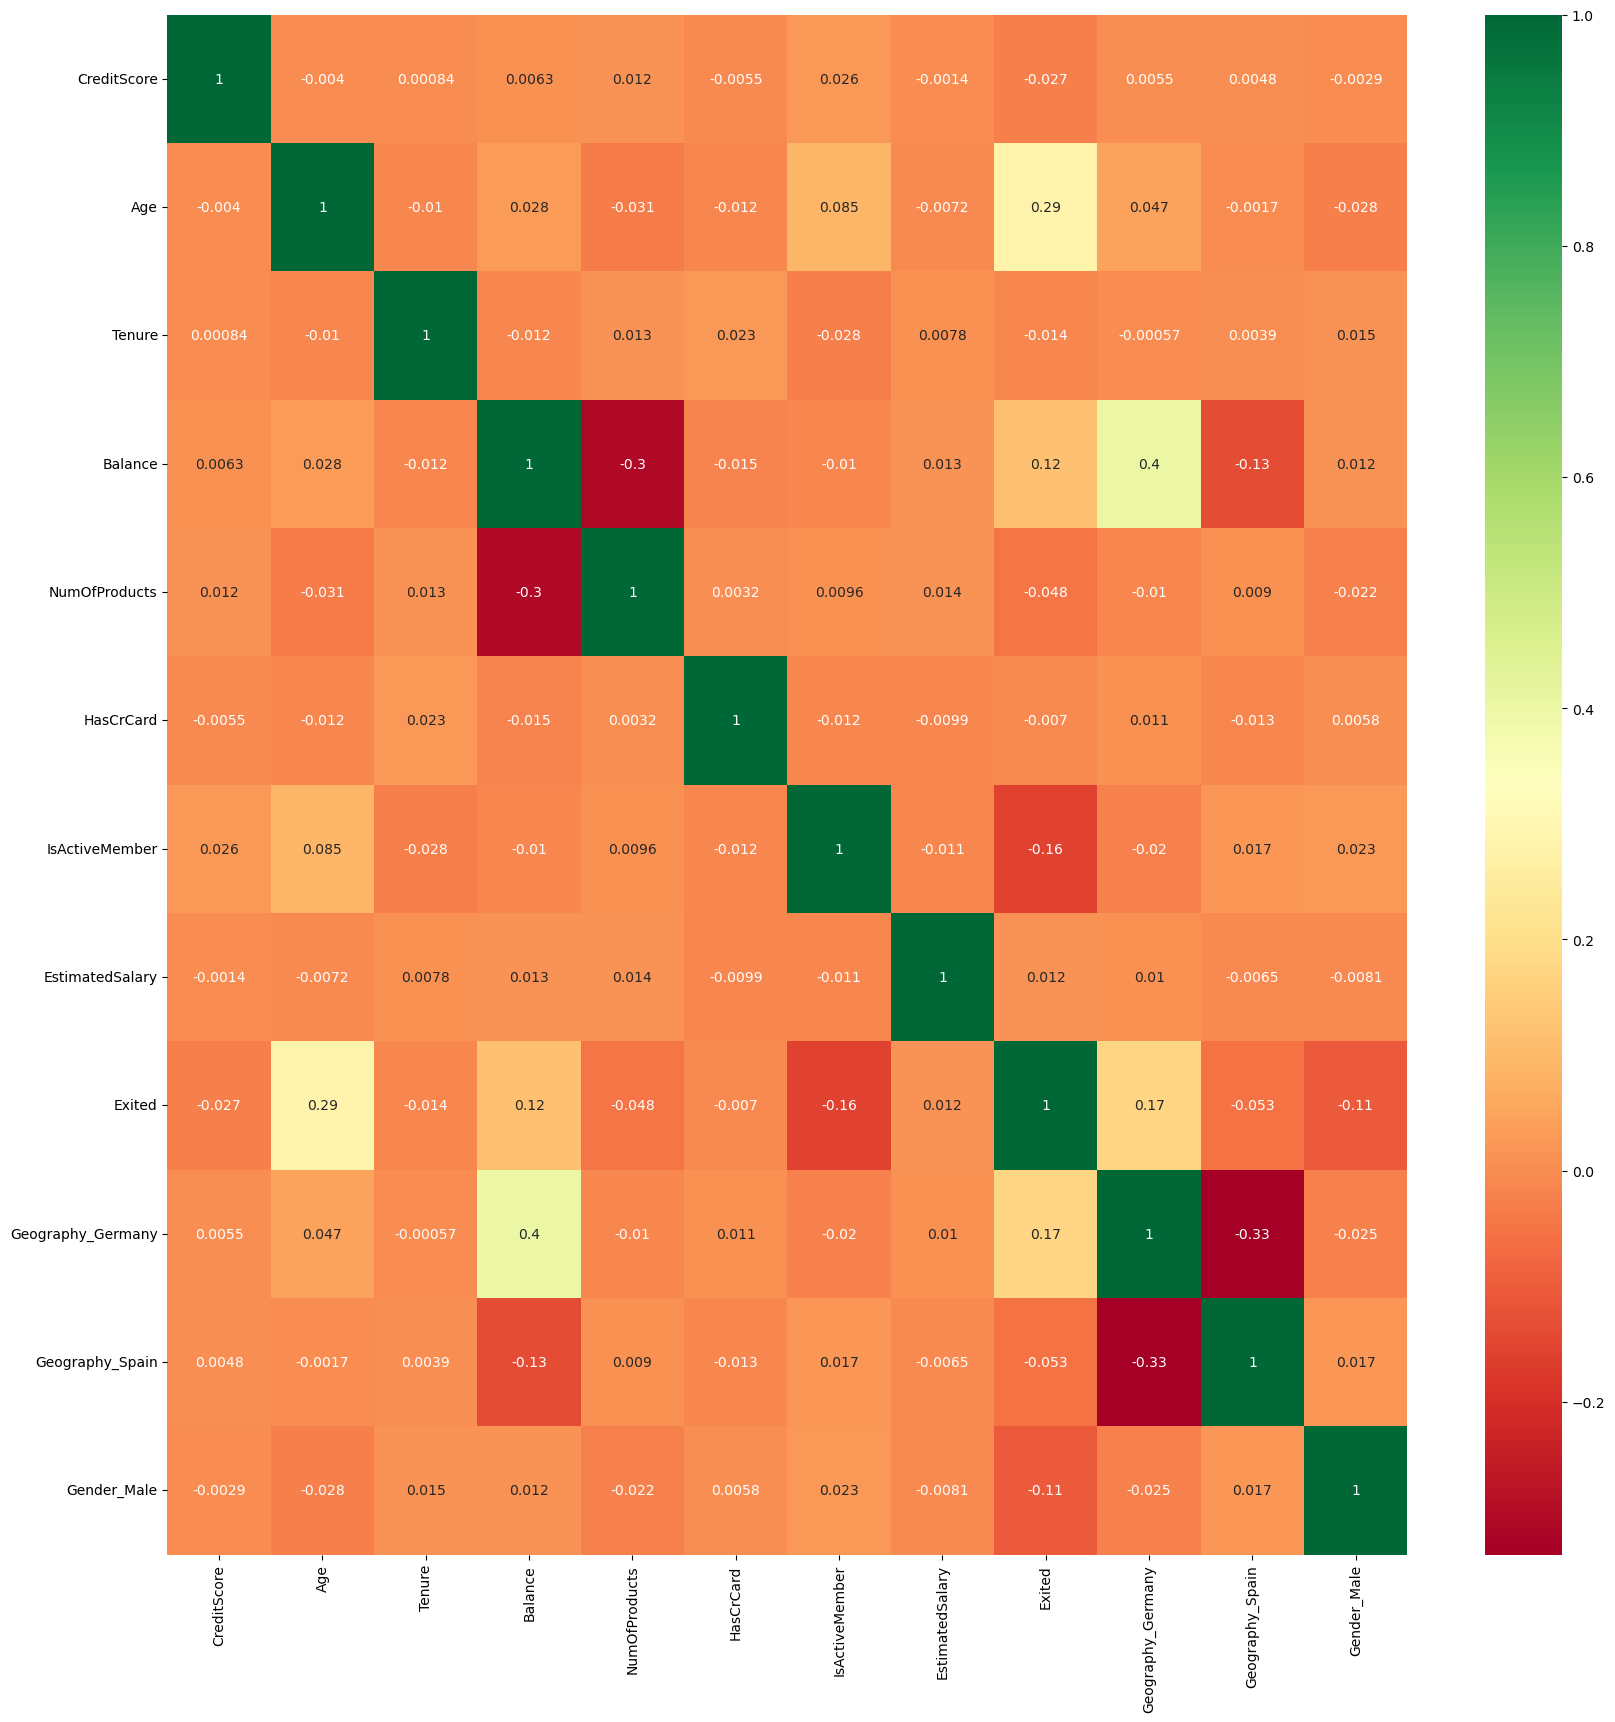

In [23]:
# Plotting The Correlations between all the features
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

From the heatmap , we find that teh Age, Balance and the Geography of the Customer are Most important features

In [24]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [25]:
# Splitting the Dataset into Dependent and Independent Variables
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [27]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [28]:
# Splitting the dataset into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [29]:
# Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


In [34]:
## Feature Importance
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X,y)

DecisionTreeClassifier()

In [35]:
model.score(X_test,y_test)

C:\Users\Sri sai phaneendra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.274

In [38]:
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.789

In [40]:
print(model.feature_importances_)

[0.14833716 0.2372339  0.07437415 0.14158239 0.11855227 0.01511726
 0.05595552 0.15369314 0.02244831 0.01156654 0.02113937]


# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
rf.score(X_test,y_test)

0.865

In [44]:
from sklearn.model_selection import GridSearchCV


In [45]:
search_dict_rfc = {'criterion':['gini','entropy'],
                  'n_estimators':(50,75,100,125,150)}

In [48]:
dt_Grid = GridSearchCV(rf,param_grid=search_dict_rfc)

In [49]:
dt_Grid

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': (50, 75, 100, 125, 150)})

In [51]:
dt_Grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': (50, 75, 100, 125, 150)})

In [52]:
dt_Grid.best_params_

{'criterion': 'entropy', 'n_estimators': 75}

# model builiding on Gradient classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gcb = GradientBoostingClassifier()
gcb.fit(X_train,y_train)

GradientBoostingClassifier()

In [57]:
gcb.score(X_test,y_test)

0.8675

# model builiding on svr classifier

In [59]:
from sklearn.svm import SVC
svc = SVC()

In [60]:
svc.fit(X_train,y_train)

SVC()

In [61]:
svc.score(X_test,y_test)

0.856

# model builiding on KNeighnors classifer

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier()
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [66]:
KN.score(X_test,y_test)

0.83

# model builiding on logistic classifer

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [69]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [70]:
logreg.score(X_test,y_test)

0.811

In [74]:
pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
acc_logreg = accuracy_score(y_test,pred)*100


In [75]:
tab1 = confusion_matrix(y_test,pred)

In [76]:
tab1

array([[1543,   64],
       [ 314,   79]], dtype=int64)

In [77]:
tab1.diagonal().sum()/tab1.sum()*100

81.10000000000001

# model builiding on AdaBoost classifer

In [78]:
from sklearn.ensemble import AdaBoostClassifier

In [79]:
adamodel = AdaBoostClassifier()

In [81]:
adamodel.fit(X_train,y_train)

AdaBoostClassifier()

In [82]:
adamodel.score(X_test,y_test)

0.856

In [114]:
dt1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
svc1 = SVC()
knn1 = KNeighborsClassifier()
ada1 = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
lr1 = LogisticRegression()


In [115]:
model = [dt1,rfc1,svc1,knn1,ada1,gbc,lr1]

In [119]:
score_list=[]
for i in model: 
    i.fit(X_train,y_train) 
    i.score(X_test,y_test)
    s=i.score(X_test,y_test)
    score_list.append(s)
    print(i)
    print(s)
    print('**************')

DecisionTreeClassifier()
0.7815
**************
RandomForestClassifier()
0.8675
**************
SVC()
0.856
**************
KNeighborsClassifier()
0.83
**************
AdaBoostClassifier()
0.856
**************
GradientBoostingClassifier()
0.8675
**************
LogisticRegression()
0.811
**************


In [126]:
s=[78,86,85,83,85,86,81]

In [120]:
score_list=[]
for i in model: 
    i.fit(X_train,y_train) 
    s=i.score(X_test,y_test)
    score_list.append(s)
r=max(score_list)
print(r)
I=score_list.index(r)
print(I)

0.8675
5


In [128]:
len(s)

7

In [129]:
models = ['DecisionTreeClassifier','RandomForestClassifier','Support Vector Machine',"KNeighborsClassifier","AdaBoostClassifier",'GradientBoostingClassifier','Logistic Regression']
acc_values = s
df = pd.DataFrame({'Model': models, 'ACC':acc_values})

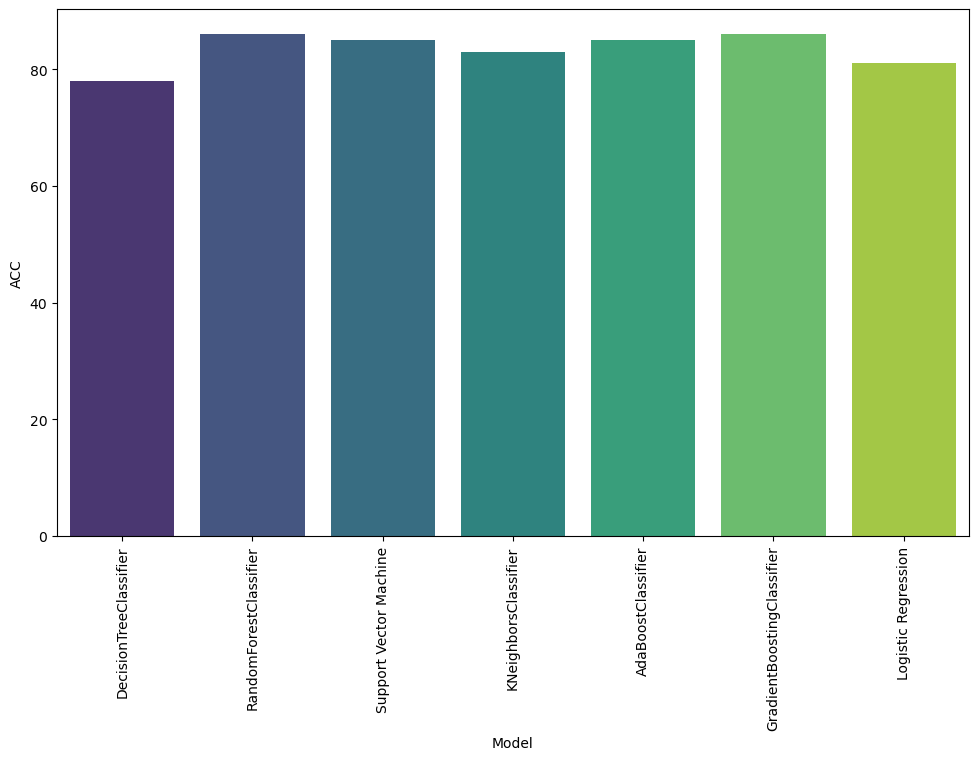

In [132]:
# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x= 'Model', y ='ACC', data= df, palette='viridis')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()